In [1]:
# Import required modules 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
matplotlib.is_interactive()

True

In [2]:
matplotlib.__version__

'3.0.2'

In [4]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [3]:
tips = sb.load_dataset('tips')

# Bar Graph

In [11]:
total_bills = tips.groupby('day',as_index=False)['total_bill'].sum()
total_bills

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


<BarContainer object of 4 artists>

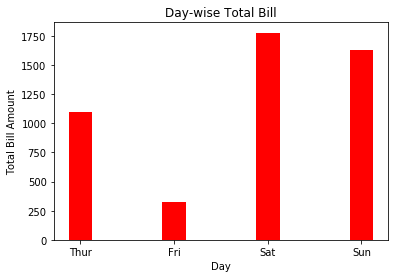

In [20]:
# Draw a bar graph
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Day-wise Total Bill")
plt.bar(x = total_bills['day'], height = total_bills['total_bill'] , width=0.25, color='red')

<BarContainer object of 4 artists>

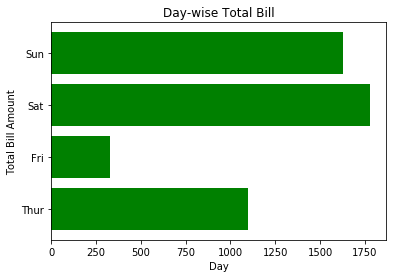

In [24]:
# Draw a horizontal bar graph
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Day-wise Total Bill")
plt.barh( y = total_bills['day'], width = total_bills['total_bill'] ,color='green')

## Line Graph

Text(0.5, 1.0, 'Total Bill Per Day')

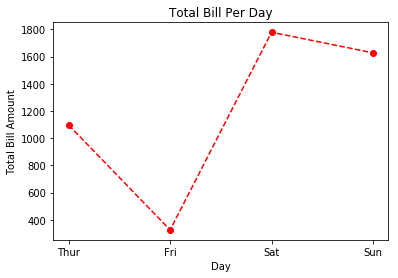

In [30]:
# Draw a line graph
plt.plot(total_bills['day'].tolist(),total_bills['total_bill'],'ro--')
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Total Bill Per Day")

Text(0.5, 1.0, 'Total Bill Per Day')

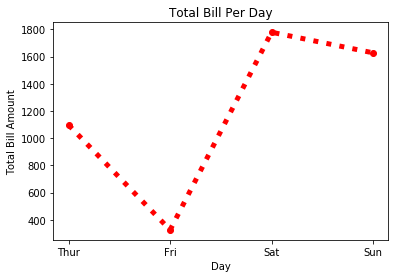

In [36]:
# Draw a line graph
plt.plot(total_bills['day'].tolist(),total_bills['total_bill'], 
         color='red', marker='o', linestyle='dotted', linewidth=5)
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Total Bill Per Day")

In [37]:
## draw for multiple values, with legend 
total = tips.groupby('day')['total_bill','tip'].sum()
total

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


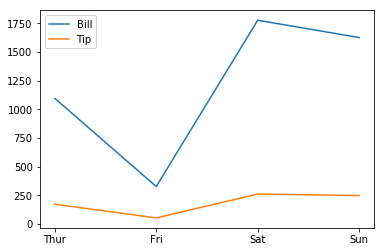

In [38]:
plt.plot(total.index.tolist(),total)
plt.legend(['Bill','Tip'])

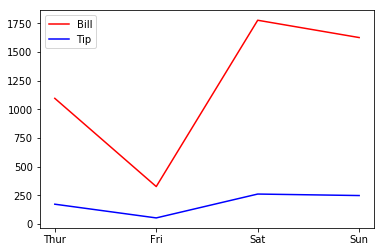

In [42]:
plt.plot(total.index.tolist(),total['total_bill'], label="Bill", color='red')
plt.plot(total.index.tolist(),total['tip'], label="Tip", color='blue')
plt.legend()

## Creating two plots for each value

Text(0.5, 1.0, 'Bill Amount')

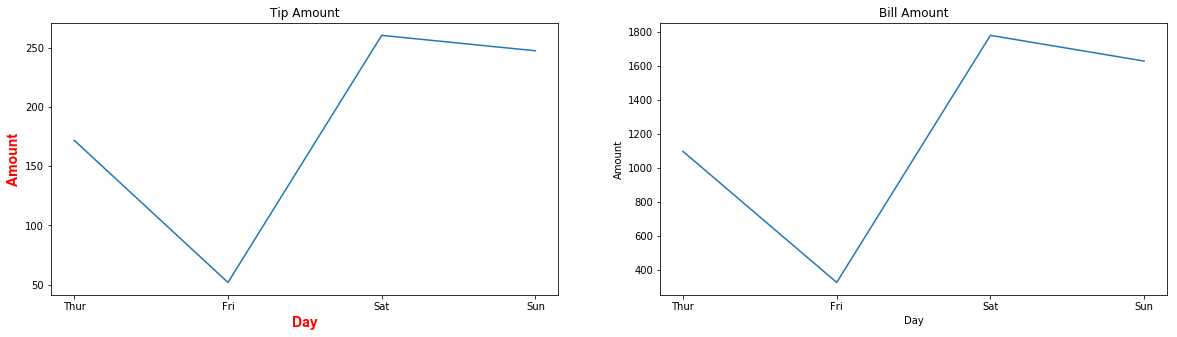

In [52]:
font = {'family': 'arial',
        'color':  'red',
        'weight': 'bold',
        'size': 14,
        }
total = tips.groupby('day')['total_bill','tip'].sum()
(fig,(ax1,ax2)) = plt.subplots(1,2)
fig.set_size_inches(20,5)
ax1.plot(total.index.tolist(), total['tip'])
ax1.set_xlabel("Day", fontdict=font)
ax1.set_ylabel("Amount", fontdict=font)
ax1.set_title("Tip Amount")
ax2.plot(total.index.tolist(), total['total_bill'])
ax2.set_xlabel("Day")
ax2.set_ylabel("Amount")
ax2.set_title("Bill Amount")

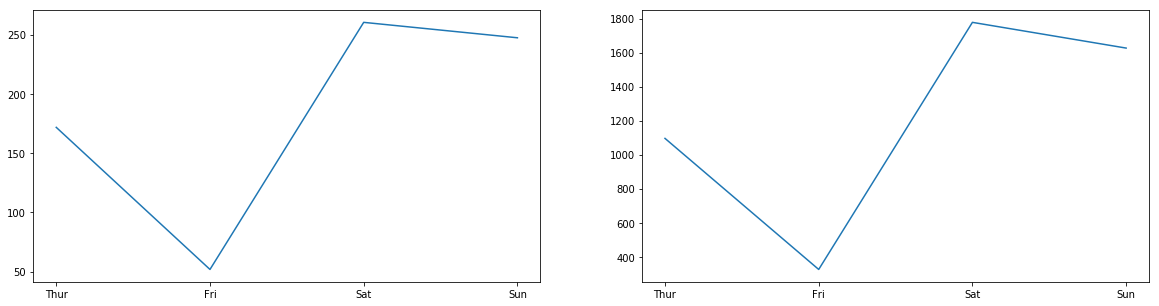

In [12]:
total = tips.groupby('day')['total_bill','tip'].sum()
(fig,ax) = plt.subplots(1,2)
fig.set_size_inches(20,5)
ax[0].plot(total.index.tolist(), total['tip'])
ax[1].plot(total.index.tolist(), total['total_bill'])

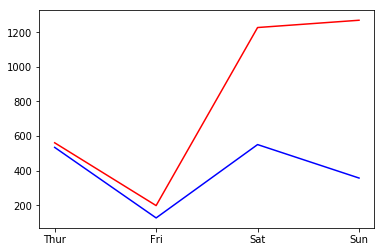

In [15]:
# Two lines - one for male bills and another for female bills
male_totals = tips[ tips['sex'] =='Male'].groupby('day', as_index=False)['total_bill'].sum()
female_totals = tips[ tips['sex'] =='Female'].groupby('day', as_index=False)['total_bill'].sum()
male_totals
plt.plot(male_totals['day'].tolist(),male_totals['total_bill'], color='red')
plt.plot(female_totals['day'].tolist(),female_totals['total_bill'], color='blue')

# Histogram

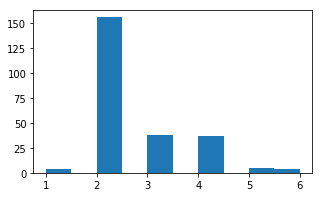

In [54]:
# draw histogram of number of persons
plt.hist(tips['size'])
plt.gcf().set_size_inches(5,3)

## Scatter plot

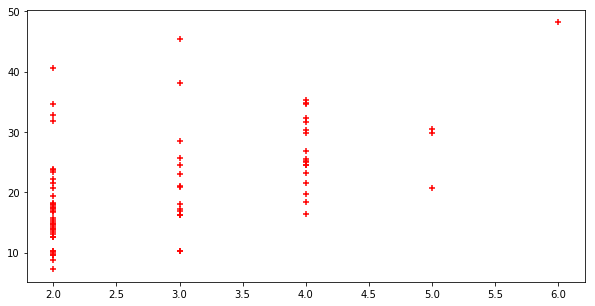

In [14]:
# draw Scatter plot of size and total bill
sun_total = tips.loc[ tips['day'] == 'Sun']
sat_total = tips.loc[ tips['day'] == 'Sat']
plt.scatter(x = sun_total['size'], y=sun_total['total_bill'], marker='+', color='red')
#plt.scatter(x = sat_total['size'], y=sat_total['total_bill'], marker='o')
plt.gcf().set_size_inches(10,5)
#plt.legend(['Sunday','Saturday'])

# Pie chart of day-wise total

In [17]:
day_total = tips.groupby('day')['total_bill'].sum()

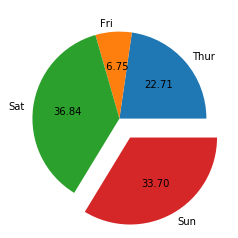

In [25]:
p = plt.pie(day_total.values, labels= day_total.index, explode=[0,0,0,0.25], autopct='%5.2f')

## Stacked Bars of total bill for male and female 

In [31]:
male_totals = tips[ tips['sex'] =='Male'].groupby(['day'], as_index=False)['total_bill'].sum()
female_totals = tips[ tips['sex'] =='Female'].groupby(['day'], as_index=False)['total_bill'].sum()
male_totals

,day,total_bill
0,Thur,561.44
1,Fri,198.57
2,Sat,1227.35
3,Sun,1269.46


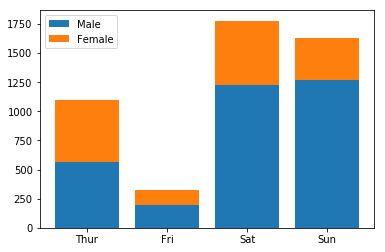

In [29]:
plt.bar(x = male_totals['day'], height = male_totals['total_bill'], label="Male")
plt.bar(x = female_totals['day'], height = female_totals['total_bill'], bottom = male_totals['total_bill'], label="Female")
plt.legend()

### Multiple bars in bar graph

Text(0.5, 1.0, 'Day-wise Total Bill for Male and Female')

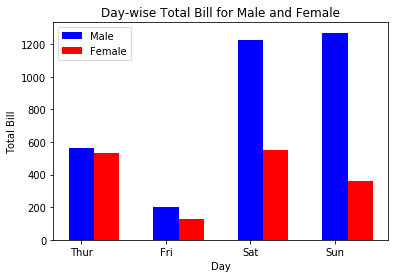

In [35]:
male_totals = tips[ tips['sex'] =='Male'].groupby(['day'], as_index=False)['total_bill'].sum()
female_totals = tips[ tips['sex'] =='Female'].groupby(['day'], as_index=False)['total_bill'].sum()
X = np.arange(4)
bar_width = 0.3
plt.bar(X + 0.00, male_totals['total_bill'], color = 'b', width = bar_width , label="Male")
plt.bar(X + bar_width, female_totals['total_bill'], color = 'r', width = bar_width, label="Female")
plt.legend()
p = plt.xticks(X, male_totals['day'])
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Day-wise Total Bill for Male and Female")

## Watermark

Text(0, 250, 'Srikanth Technologies')

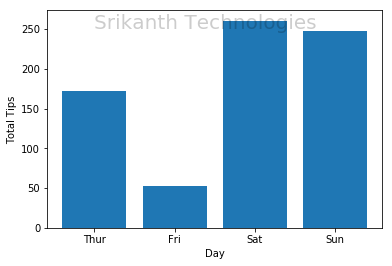

In [39]:
total_tips = tips.groupby('day', as_index=False)['tip'].sum()
ax = plt.subplot()
ax.bar(total_tips['day'], total_tips['tip'])
ax.set_xlabel("Day")
ax.set_ylabel("Total Tips")
ax.text(0,250,"Srikanth Technologies", fontsize="20", alpha=0.2)

## Draw Scatter plot with regression line 

In [40]:
df = pd.read_csv("Admission.csv")

In [66]:
df = df.loc[:,  ['GRE Score','TOEFL Score']].head(20)

In [67]:
X = df['GRE Score']
Y = df['TOEFL Score']

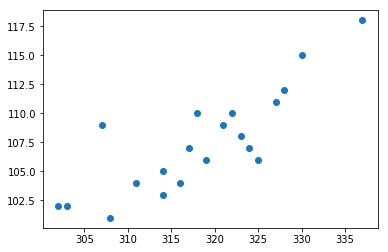

In [68]:
plt.scatter(x=df['GRE Score'], y=df['TOEFL Score'])

## Box plot

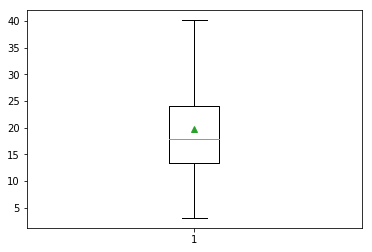

In [41]:
total_bills = tips['total_bill']
p = plt.boxplot(total_bills, showmeans=True, showfliers=False)

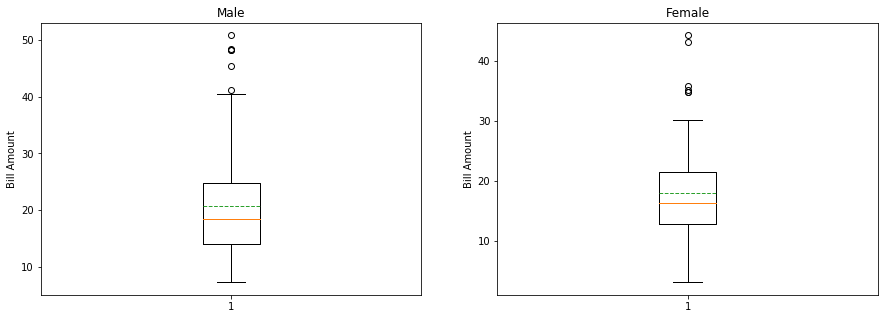

In [94]:
# Distribution of Total bill mount by sex 
male_totals = tips.loc [ tips['sex'] =='Male', ['total_bill']]
female_totals = tips.loc [ tips['sex'] =='Female', ['total_bill']]
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
 
ax[0].boxplot(male_totals['total_bill'], meanline=True,  showmeans=True)
ax[0].set_ylabel("Bill Amount")
ax[0].set_title("Male")
ax[1].boxplot( female_totals['total_bill'], meanline=True,  showmeans=True)
ax[1].set_ylabel("Bill Amount")
ax[1].set_title("Female")
plt.show()